# Importing libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

 # Data Collection and Understanding:

In [4]:
df = pd.read_csv("C:\\Users\\franc\\Desktop\\capstone project\\customer_train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(1680, 31)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
df_cleaned = df.dropna(subset=['Income'])

In [9]:
df_cleaned.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [10]:
del df_cleaned['Unnamed: 0']

In [11]:
df=df_cleaned

In [12]:
# converting datatypes of specific columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [13]:
df.head(20)

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,...,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,S1,Cerai,55635000.0,0,1,2012-11-13,34,...,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,S3,Menikah,33454000.0,1,0,2013-05-08,32,...,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,2013-06-06,19,...,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,2014-03-13,68,...,20,1,0,0,0,0,0,3,11,0


In [14]:
df.columns

Index(['Unnamed: 0.1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [15]:
df.describe()

,Unnamed: 0.1,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663,1663.000000,1.663000e+03,1663.000000,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.0,1663.000000
mean,843.901383,5547.541191,1968.849068,5.201434e+07,0.449188,0.499098,2013-07-11 01:37:50.835838720,49.061335,3.060469e+05,25978.352375,...,5.331930,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,3.0,11.0,0.145520
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,428.500000,2814.500000,1960.000000,3.568800e+07,0.000000,0.000000,2013-01-17 00:00:00,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,844.000000,5376.000000,1970.000000,5.125000e+07,0.000000,0.000000,2013-07-11 00:00:00,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.500000,8369.500000,1977.000000,6.812200e+07,1.000000,1.000000,2013-12-29 00:00:00,74.000000,4.990000e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,482.471617,3240.106517,12.037325,2.148248e+07,0.544890,0.549449,NaN,28.914182,3.392420e+05,39576.041604,...,2.451058,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.0,0.0,0.352731


In [16]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [17]:
Mar_Stat={
    'Lajang': 'single',
    'Bertunangan':'Engaged',
    'Menikah':'Married',
    'Cerai':'Divorced',
    'Janda':'Widowed',
    'Duda':'Widowed'
}
    

In [18]:
for i,j in Mar_Stat.items():
    df.loc[df['Marital_Status']==i,'Marital_Status']=j
df['Marital_Status'].unique()

array(['single', 'Engaged', 'Married', 'Divorced', 'Widowed'],
      dtype=object)

In [19]:
df.duplicated().sum()

0

In [20]:
df.loc[df['Income'].isna(), 'Income'] = df['Income'].median()

# Exploratory Data Analysis (EDA)

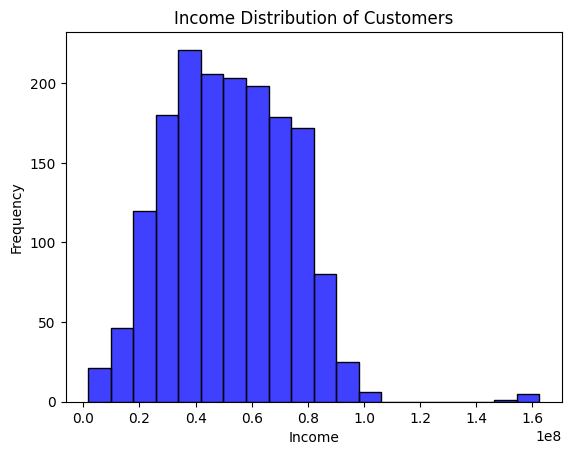

In [21]:
sns.histplot(df['Income'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution of Customers')
plt.show()


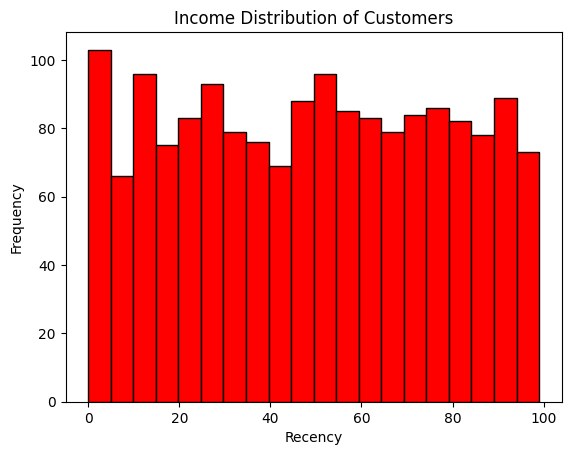

In [22]:
plt.hist(df['Recency'], bins=20, color='red', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Income Distribution of Customers')
plt.show()

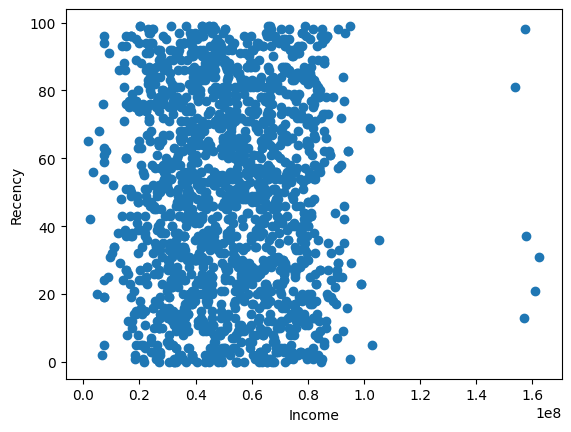

In [23]:
plt.scatter(df['Income'], df['Recency'])

# Add labels and a title
plt.xlabel('Income')
plt.ylabel('Recency')

# Show the plot
plt.show()

# Campaign Response Metrics

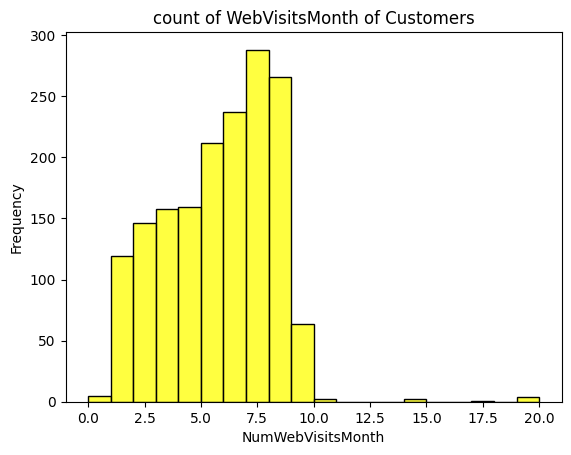

In [24]:
sns.histplot(df['NumWebVisitsMonth'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Frequency')
plt.title('count of WebVisitsMonth of Customers')
plt.show()


In [25]:
import datetime
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,0,5524,1957,S1,single,58138000.0,0,0,2012-09-04,58,...,0,0,0,0,0,0,3,11,1,66
1,1,2174,1954,S1,single,46344000.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,3,11,0,69
2,2,4141,1965,S1,Engaged,71613000.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,3,11,0,58
3,3,6182,1984,S1,Engaged,26646000.0,1,0,2014-02-10,26,...,0,0,0,0,0,0,3,11,0,39
4,4,5324,1981,S3,Married,58293000.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,4712,1991,D3,Engaged,20193000.0,0,0,2012-11-28,18,...,0,0,0,0,0,0,3,11,0,32
1676,1676,1170,1975,S1,Married,27573000.0,1,0,2013-03-25,45,...,0,0,0,0,0,0,3,11,0,48
1677,1677,6347,1979,SMA,single,15862000.0,1,0,2013-06-27,26,...,0,0,0,0,0,0,3,11,0,44
1678,1678,4065,1976,S3,Married,49544000.0,1,0,2013-02-12,0,...,0,0,0,0,0,0,3,11,0,47


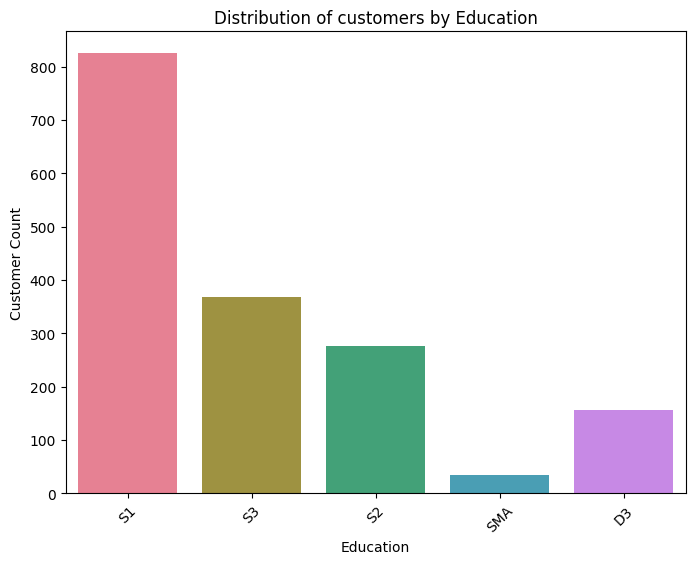

In [26]:
# Define a Seaborn color palette with different colors for each category
palette = sns.color_palette("husl", len(df['Education'].unique()))

# Create a bar plot to visualize the distribution of customers by Education
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', palette=palette)

plt.title('Distribution of customers by Education')
plt.xlabel('Education')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)

plt.show()

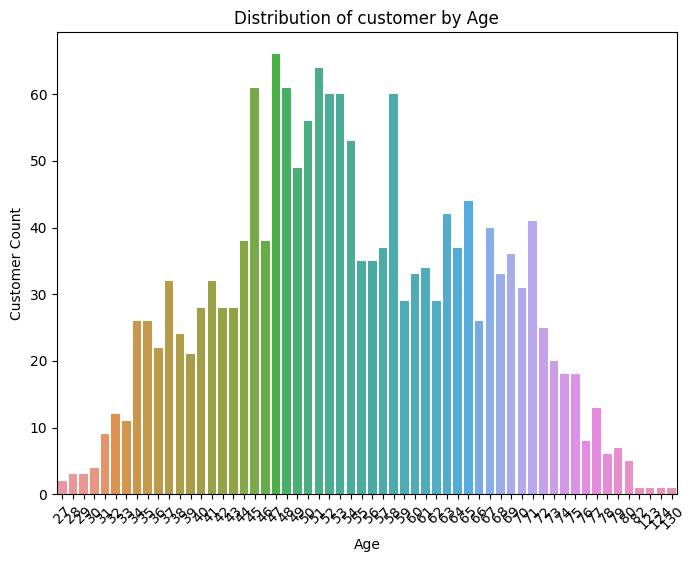

In [27]:

plt.figure(figsize=(8, 6))
sns.countplot(x=df['Age'])

plt.title('Distribution of customer by Age')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)

plt.show()

# Outliers using zscore and IQR method

In [28]:
# iqr method
q1 = df.Year_Birth.quantile(0.25)
q3 = df.Year_Birth.quantile(0.75)

iqr = q3-q1
iqr

17.0

In [29]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# outliers
df[(df.Year_Birth<lower) | (df.Year_Birth>upper)][['Year_Birth']].head()

,Year_Birth
192,1900
239,1893
339,1899


In [30]:
df_iqr = df[(df.Year_Birth>lower) & (df.Year_Birth<upper)]

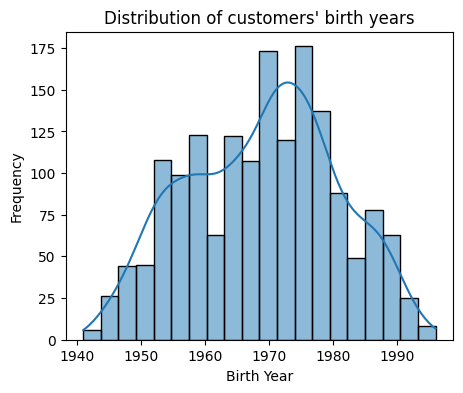

In [31]:
plt.figure(figsize=(5,4))

sns.histplot(df_iqr['Year_Birth'], kde=True)
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title("Distribution of customers' birth years")

plt.show()

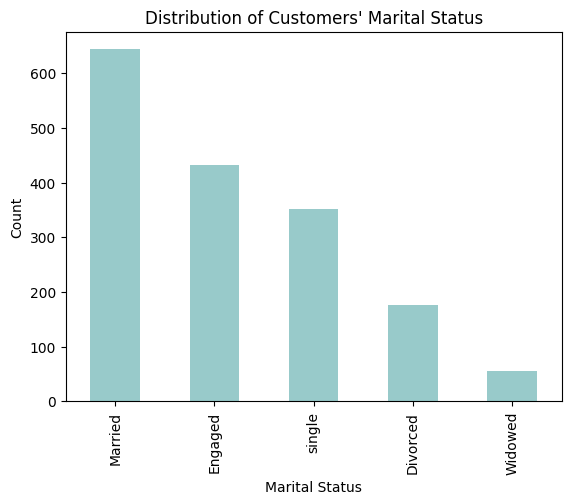

In [32]:
ax = df_iqr['Marital_Status'].value_counts() \
    .plot(kind='bar', 
          title="Distribution of Customers' Marital Status",
          color='#98caca')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')


plt.show()

In [33]:
# zscore method
m=df.Income.mean()
m

52014343.35538184

In [34]:
s=df.Income.std()
s

21482477.95704808

In [35]:
df['zscore']=(df.Income-m)/s


In [36]:
outliers=df[(df.zscore<-3)|(df.zscore>3)]
outliers

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,zscore
164,164,8475,1973,S3,Married,157243000.0,0,1,2014-03-01,98,...,0,0,0,0,0,3,11,0,50,4.898348
617,617,1503,1976,S3,Engaged,162397000.0,1,1,2013-06-03,31,...,0,0,0,0,0,3,11,0,47,5.138265
655,655,5555,1975,S1,Divorced,153924000.0,0,0,2014-02-07,81,...,0,0,0,0,0,3,11,0,48,4.743850
687,687,1501,1982,S3,Married,160803000.0,0,0,2012-08-04,21,...,0,0,0,0,0,3,11,0,41,5.064065
1300,1300,5336,1971,S2,Engaged,157733000.0,1,0,2013-06-04,37,...,0,0,0,0,0,3,11,0,52,4.921157
1653,1653,4931,1977,S1,Engaged,157146000.0,0,0,2013-04-29,13,...,0,0,0,0,0,3,11,0,46,4.893833


# correlation

In [37]:
df_corr = df[['ID','Income','Recency','MntCoke','MntFruits','MntMeatProducts',
              'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain',
              'Z_Revenue','Response',
              'Age','zscore']].corr()
df_corr

,ID,Income,Recency,MntCoke,MntFruits,MntMeatProducts,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,Age,zscore
ID,1.000000,0.022376,-0.044177,0.004183,0.030590,0.022695,-0.005628,0.011904,-0.007754,0.001680,0.050714,NaN,-0.010307,-0.020515,0.022376
Income,0.022376,1.000000,-0.019091,0.686060,0.503633,0.694399,0.219394,0.386579,0.328570,0.092016,-0.038510,NaN,0.141382,0.198168,1.000000
Recency,-0.044177,-0.019091,1.000000,-0.004962,-0.034604,0.011118,0.014901,-0.023856,-0.043525,-0.023708,0.013020,NaN,-0.179394,0.032707,-0.019091
MntCoke,0.004183,0.686060,-0.004962,1.000000,0.379728,0.557398,0.379340,0.468647,0.358517,0.192723,-0.047836,NaN,0.228834,0.171492,0.686060
MntFruits,0.030590,0.503633,-0.034604,0.379728,1.000000,0.538620,0.001548,0.233860,0.195295,-0.000916,-0.015054,NaN,0.122677,0.020878,0.503633
MntMeatProducts,0.022695,0.694399,0.011118,0.557398,0.538620,1.000000,0.092867,0.365088,0.304301,0.033932,-0.038867,NaN,0.206300,0.036398,0.694399
AcceptedCmp4,-0.005628,0.219394,0.014901,0.379340,0.001548,0.092867,1.000000,0.319490,0.251480,0.263922,-0.028721,NaN,0.189619,0.077412,0.219394
AcceptedCmp5,0.011904,0.386579,-0.023856,0.468647,0.233860,0.365088,0.319490,1.000000,0.409518,0.208007,-0.027829,NaN,0.328828,0.007355,0.386579
AcceptedCmp1,-0.007754,0.328570,-0.043525,0.358517,0.195295,0.304301,0.251480,0.409518,1.000000,0.200514,-0.026114,NaN,0.311367,0.023106,0.328570
AcceptedCmp2,0.001680,0.092016,-0.023708,0.192723,-0.000916,0.033932,0.263922,0.208007,0.200514,1.000000,-0.011213,NaN,0.157844,0.022454,0.092016


<Axes: >

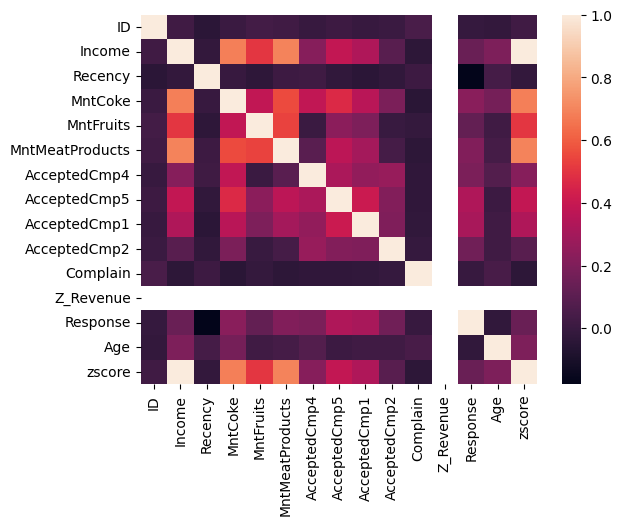

In [38]:
sns.heatmap(df_corr)

In [39]:
from scipy.stats import skew, kurtosis
df['Income'].skew()
# skewness between -0.5 and 0.5 are considered fairly symmetrical 

0.39932831752269815

In [40]:
kurtosis(df['Income'], fisher=False)
# Kurtosis > 3 is Leptokurtic; meaning it has heavier tails than a normal distribution
# a heavier positive tail; indicating presence of higher frequency of high income customers

3.96509574898958

In [41]:
df.describe()

,Unnamed: 0.1,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,zscore
count,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663,1663.000000,1.663000e+03,1663.000000,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.0,1663.000000,1663.000000,1.663000e+03
mean,843.901383,5547.541191,1968.849068,5.201434e+07,0.449188,0.499098,2013-07-11 01:37:50.835838720,49.061335,3.060469e+05,25978.352375,...,0.073963,0.069753,0.061936,0.012026,0.010222,3.0,11.0,0.145520,54.150932,5.287412e-17
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,-2.340714e+00
25%,428.500000,2814.500000,1960.000000,3.568800e+07,0.000000,0.000000,2013-01-17 00:00:00,24.000000,2.400000e+04,1000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,-7.599842e-01
50%,844.000000,5376.000000,1970.000000,5.125000e+07,0.000000,0.000000,2013-07-11 00:00:00,50.000000,1.730000e+05,8000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,-3.557985e-02
75%,1259.500000,8369.500000,1977.000000,6.812200e+07,1.000000,1.000000,2013-12-29 00:00:00,74.000000,4.990000e+05,32000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,7.498044e-01
max,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.492000e+06,199000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,5.138265e+00
std,482.471617,3240.106517,12.037325,2.148248e+07,0.544890,0.549449,NaN,28.914182,3.392420e+05,39576.041604,...,0.261789,0.254808,0.241112,0.109037,0.100618,0.0,0.0,0.352731,12.037325,1.000000e+00


In [42]:
df.columns

Index(['Unnamed: 0.1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'zscore'],
      dtype='object')

In [43]:
df_iqr['Total_amount'] = df_iqr['MntCoke'] + df_iqr['MntFruits'] +df_iqr['MntMeatProducts'] + df_iqr['MntFishProducts'] + df_iqr['MntSweetProducts'] + df_iqr['MntGoldProds']

C:\Users\franc\AppData\Local\Temp\ipykernel_4132\897676288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['Total_amount'] = df_iqr['MntCoke'] + df_iqr['MntFruits'] +df_iqr['MntMeatProducts'] + df_iqr['MntFishProducts'] + df_iqr['MntSweetProducts'] + df_iqr['MntGoldProds']


In [44]:
min = df['Recency'].min()
max = df['Recency'].max()
mean = df['Recency'].mean()
median = df['Recency'].median()
print(f"Minimum of Customers' Recency: {min}")
print(f"Maximum of Customers' Recency: {max}")
print(f"Mean of Customers' Recency: {mean}")
print(f"Median of Customers' Recency: {median}")

Minimum of Customers' Recency: 0
Maximum of Customers' Recency: 99
Mean of Customers' Recency: 49.061334936861094
Median of Customers' Recency: 50.0


In [45]:
count_complain = df_iqr.groupby(['Complain']).size().reset_index(name='count')
count_complain

,Complain,count
0,0,1644
1,1,16


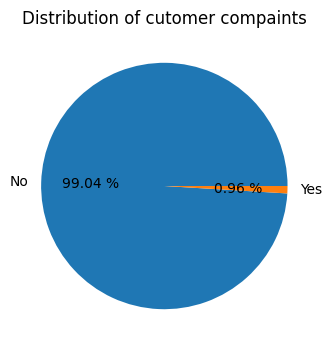

In [46]:
plt.figure(figsize=(4,4))

label = ['No', 'Yes']
count = count_complain['count']
plt.pie(count, labels=label, autopct='%.2f %%')

plt.title('Distribution of cutomer compaints')

plt.show()

In [47]:
prods = ['MntCoke', 'MntCoke', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
count = []

for prod in prods:
    count.append(df_iqr.loc[df_iqr[prod]>0, prod].size)

prod_count = pd.DataFrame([prods, count], index=['Products', 'Count']).T
prod_count

,Products,Count
0,MntCoke,1651
1,MntCoke,1651
2,MntMeatProducts,1660
3,MntFishProducts,1379
4,MntSweetProducts,1347
5,MntGoldProds,1615


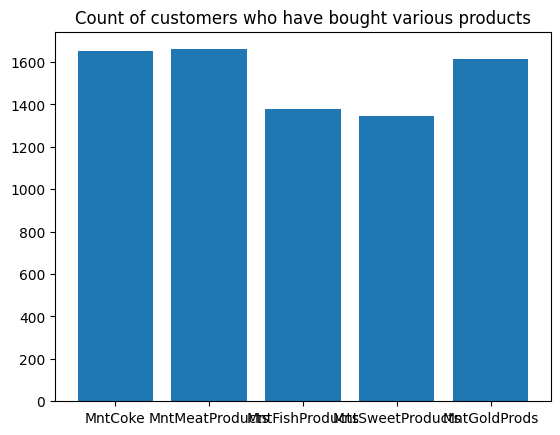

In [48]:
plt.bar(prod_count['Products'], prod_count['Count'])
plt.title('Count of customers who have bought various products')
plt.show()

In [49]:
amt = []
for prod in prods:
    amt.append(df_iqr[prod].sum())

prod_amt = pd.DataFrame([prods, amt], index=['Products', 'Amount']).T
prod_amt

,Products,Amount
0,MntCoke,508178000
1,MntCoke,508178000
2,MntMeatProducts,276239000
3,MntFishProducts,61596000
4,MntSweetProducts,44799000
5,MntGoldProds,71809000


In [51]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Last Campaign']
cols_to_count = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
counts = []

for col in cols_to_count:
    counts.append(df.loc[df[col] == 1, col].value_counts())
    
my_dict = {campaigns[i]: counts[i] for i in range(len(campaigns))}
    
df_campaign = pd.DataFrame(my_dict).T.rename(columns={1: 'Count'})
df_campaign

,Count
AcceptedCmp1,103
AcceptedCmp2,20
AcceptedCmp3,120
AcceptedCmp4,123
AcceptedCmp5,116
Last Campaign,242


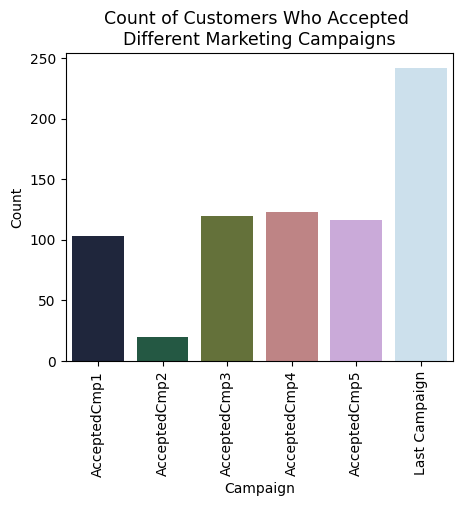

In [52]:
plt.figure(figsize=(5, 4), dpi=100)
sns.barplot(x=df_campaign.index, 
            y="Count",  
            data=df_campaign,
            palette='cubehelix')

plt.xlabel("Campaign")
plt.ylabel("Count")
plt.title("Count of Customers Who Accepted \nDifferent Marketing Campaigns", fontsize=12.5)
plt.xticks(rotation=90)

plt.show()

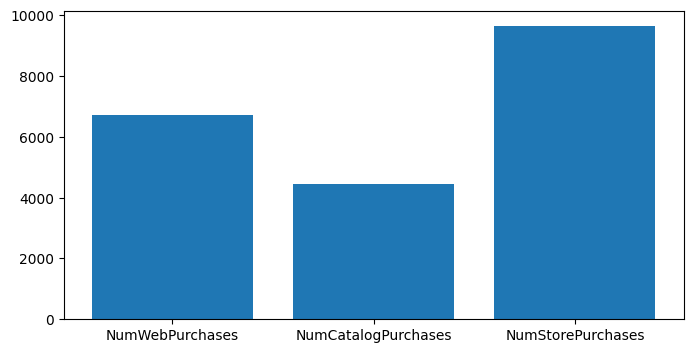

In [56]:
plt.figure(figsize=(8,4))

x = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
plt.bar(x, [df[i].sum() for i in x])
plt.show()


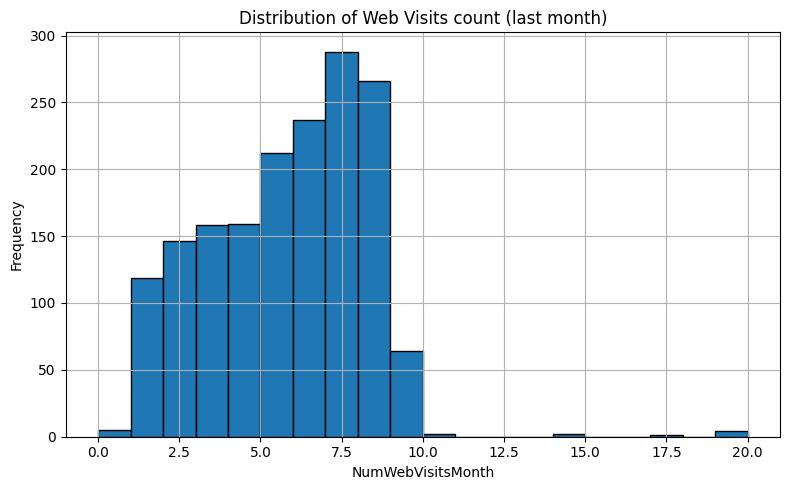

In [59]:
plt.figure(figsize=(8, 5))

plt.hist(df['NumWebVisitsMonth'], bins=20, edgecolor='black')

plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Frequency')
plt.title('Distribution of Web Visits count (last month)')


plt.grid(True)
plt.tight_layout()

plt.show()

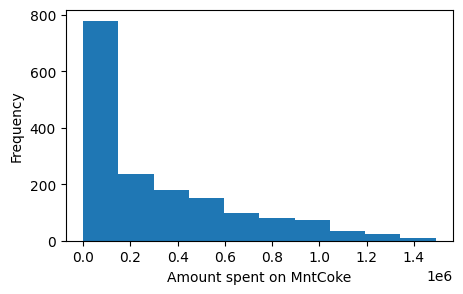

Minimum amount spent on MntCoke: 0
Maximum amount spent on MntCoke: 1492000
Mean of amount spent on MntCoke: 306046.9
Median amount spent on MntCoke: 173000.0
Total amount spent on MntCoke: 508956000
Count of customers who have bought MntCoke: 1654


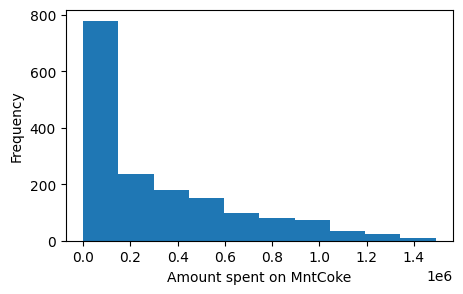

Minimum amount spent on MntCoke: 0
Maximum amount spent on MntCoke: 1492000
Mean of amount spent on MntCoke: 306046.9
Median amount spent on MntCoke: 173000.0
Total amount spent on MntCoke: 508956000
Count of customers who have bought MntCoke: 1654


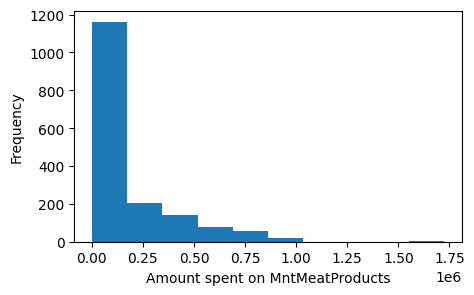

Minimum amount spent on MntMeatProducts: 1000
Maximum amount spent on MntMeatProducts: 1725000
Mean of amount spent on MntMeatProducts: 166454.6
Median amount spent on MntMeatProducts: 68000.0
Total amount spent on MntMeatProducts: 276814000
Count of customers who have bought MntMeatProducts: 1663


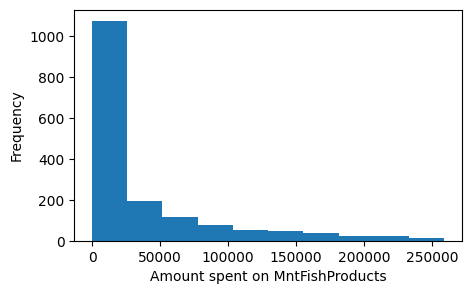

Minimum amount spent on MntFishProducts: 0
Maximum amount spent on MntFishProducts: 259000
Mean of amount spent on MntFishProducts: 37110.04
Median amount spent on MntFishProducts: 12000.0
Total amount spent on MntFishProducts: 61714000
Count of customers who have bought MntFishProducts: 1382


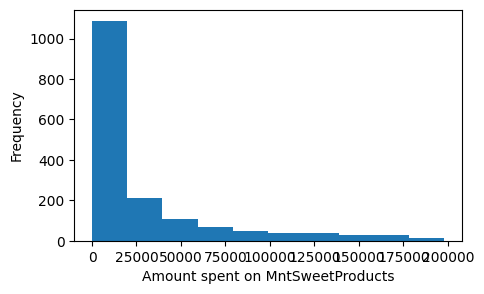

Minimum amount spent on MntSweetProducts: 0
Maximum amount spent on MntSweetProducts: 198000
Mean of amount spent on MntSweetProducts: 26979.56
Median amount spent on MntSweetProducts: 8000.0
Total amount spent on MntSweetProducts: 44867000
Count of customers who have bought MntSweetProducts: 1349


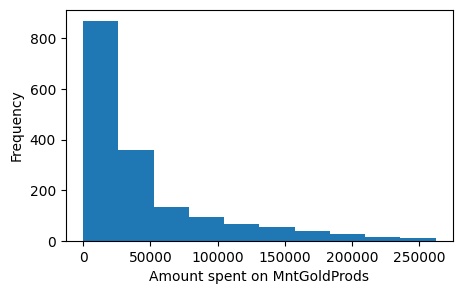

Minimum amount spent on MntGoldProds: 0
Maximum amount spent on MntGoldProds: 262000
Mean of amount spent on MntGoldProds: 43331.33
Median amount spent on MntGoldProds: 24000.0
Total amount spent on MntGoldProds: 72060000
Count of customers who have bought MntGoldProds: 1618


In [60]:
# to find  a relationship between income (Income) and spending on specific product categories?

for prod in prods:
    plt.figure(figsize=(5,3))
    plt.hist(df[prod])
    plt.xlabel(f'Amount spent on {prod}')
    plt.ylabel('Frequency')
    plt.show()
    print(f"Minimum amount spent on {prod}:", df[prod].min())
    print(f"Maximum amount spent on {prod}:", df[prod].max())
    print(f"Mean of amount spent on {prod}:", round(df[prod].mean(),2))
    print(f"Median amount spent on {prod}:", df[prod].median())
    print(f"Total amount spent on {prod}:", df[prod].sum())
    print(f"Count of customers who have bought {prod}:", df.loc[df[prod] >0, prod].shape[0])

In [61]:
df.columns

Index(['Unnamed: 0.1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'zscore'],
      dtype='object')

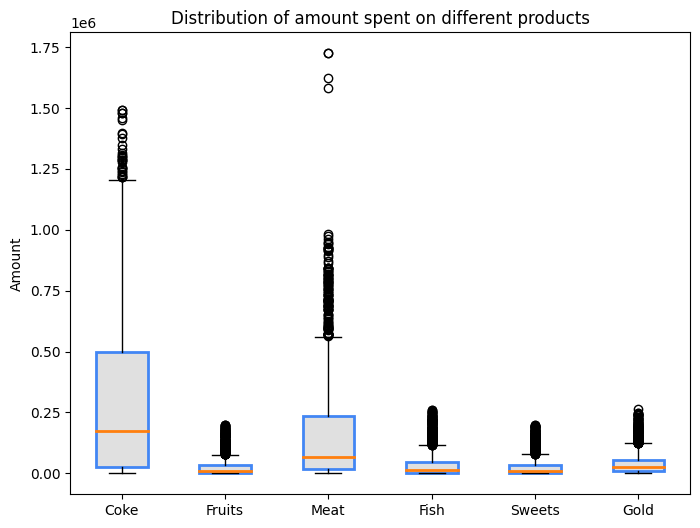

In [62]:
plt.figure(figsize=(8,6), dpi=100)

coke = df_iqr['MntCoke']
fruits = df_iqr['MntFruits']
meat = df_iqr['MntMeatProducts']
fish = df_iqr['MntFishProducts']
sweets = df_iqr['MntSweetProducts']
gold = df_iqr['MntGoldProds']

labels = ["Coke", "Fruits", "Meat", "Fish", "Sweets", "Gold"]
          
bp = plt.boxplot([coke, fruits, meat, fish, sweets, gold],
                 labels=labels,
                 patch_artist=True, 
                 medianprops={'linewidth': 2})

plt.title('Distribution of amount spent on different products')
plt.ylabel('Amount')

for box in bp['boxes']:
    box.set(color='#4286f4', linewidth=2)
    box.set(facecolor = '#e0e0e0')
    
plt.show()

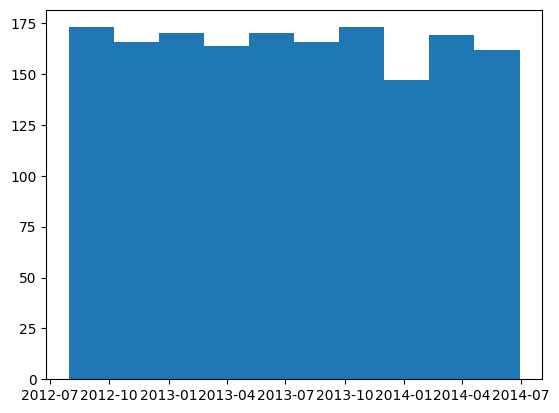

In [64]:
plt.hist(df_iqr.Dt_Customer)
plt.show()

In [66]:
df_iqr.drop(columns=['Recency', 'Dt_Customer'], inplace=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_4132\2219970763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr.drop(columns=['Recency', 'Dt_Customer'], inplace=True)


# Encoding

In [195]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [67]:
cols_to_encode =['Education', 'Marital_Status']

In [70]:
new_encoded_cols_names = []
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)

df_one_hot_encoded.head()
    

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,is_S1,is_S3,is_S2,is_SMA,is_D3,is_single,is_Engaged,is_Married,is_Divorced,is_Widowed
0,0,5524,1957,S1,single,58138000.0,0,0,2012-09-04,58,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,2174,1954,S1,single,46344000.0,1,1,2014-03-08,38,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,4141,1965,S1,Engaged,71613000.0,0,0,2013-08-21,26,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,6182,1984,S1,Engaged,26646000.0,1,0,2014-02-10,26,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,5324,1981,S3,Married,58293000.0,1,0,2014-01-19,94,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
df_one_hot_encoded.shape

(1663, 42)

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

cols_to_encode = ['Education', 'Marital_Status']
for col in cols_to_encode:
    df_iqr.loc[:, col] = label_encoder.fit_transform(df_iqr[col])
    
df_iqr.head()

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_amount
0,0,5524,1957,1,4,58138000.0,0,0,635000,88000,...,0,0,0,0,0,3,11,1,66,1617000
1,1,2174,1954,1,4,46344000.0,1,1,11000,1000,...,0,0,0,0,0,3,11,0,69,27000
2,2,4141,1965,1,1,71613000.0,0,0,426000,49000,...,0,0,0,0,0,3,11,0,58,776000
3,3,6182,1984,1,1,26646000.0,1,0,11000,4000,...,0,0,0,0,0,3,11,0,39,53000
4,4,5324,1981,3,2,58293000.0,1,0,173000,43000,...,0,0,0,0,0,3,11,0,42,422000


In [84]:
df_iqr['Education'] = pd.to_numeric(df_iqr['Education'])
df_iqr['Marital_Status'] = pd.to_numeric(df_iqr['Marital_Status'])

C:\Users\franc\AppData\Local\Temp\ipykernel_4132\3607466403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['Education'] = pd.to_numeric(df_iqr['Education'])
C:\Users\franc\AppData\Local\Temp\ipykernel_4132\3607466403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['Marital_Status'] = pd.to_numeric(df_iqr['Marital_Status'])


In [82]:
df_iqr.loc[:, ['Education', 'Marital_Status']].dtypes

Education         int64
Marital_Status    int64
dtype: object

# Data Splitting & feature scaling

In [85]:
numeric_columns = df_iqr.select_dtypes(include=['number'])

In [89]:
scaler = StandardScaler()
scaler.fit(numeric_columns)
scaled_data = pd.DataFrame(scaler.transform(numeric_columns), columns=numeric_columns.columns)

scaled_data.head()

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_amount
0,-1.752642,-0.006651,-1.027908,-0.580060,1.610717,0.285805,-0.824844,-0.909038,0.969790,1.571842,...,-0.282889,-0.272825,-0.257202,-0.110432,-0.098653,0.0,0.0,2.420641,1.027908,1.679725
1,-1.750567,-1.041558,-1.285350,-0.580060,1.610717,-0.263335,1.010600,0.911231,-0.870303,-0.631495,...,-0.282889,-0.272825,-0.257202,-0.110432,-0.098653,0.0,0.0,-0.413114,1.285350,-0.961527
2,-1.748493,-0.433897,-0.341395,-0.580060,-0.786584,0.913213,-0.824844,-0.909038,0.353477,0.584139,...,-0.282889,-0.272825,-0.257202,-0.110432,-0.098653,0.0,0.0,-0.413114,0.341395,0.282685
3,-1.746419,0.196623,1.289072,-0.580060,-0.786584,-1.180492,1.010600,-0.909038,-0.870303,-0.555518,...,-0.282889,-0.272825,-0.257202,-0.110432,-0.098653,0.0,0.0,-0.413114,-1.289072,-0.918337
4,-1.744345,-0.068436,1.031630,1.419732,0.012516,0.293022,1.010600,-0.909038,-0.392587,0.432185,...,-0.282889,-0.272825,-0.257202,-0.110432,-0.098653,0.0,0.0,-0.413114,-1.031630,-0.305367


# KMeans

In [86]:
from sklearn.cluster import KMeans

In [90]:
wcss = []     
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

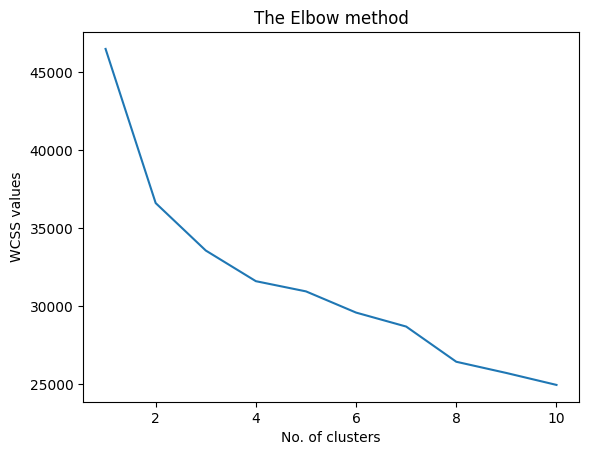

In [91]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS values')
plt.show()

In [93]:
km = KMeans(n_clusters = 7)
y_predicted = km.fit_predict(scaled_data)
y_predicted

C:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 0, ..., 2, 2, 2])

In [97]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_data.drop('Cluster_KMeans', axis=1), y_predicted)
silhouette_avg

0.11011669951109282

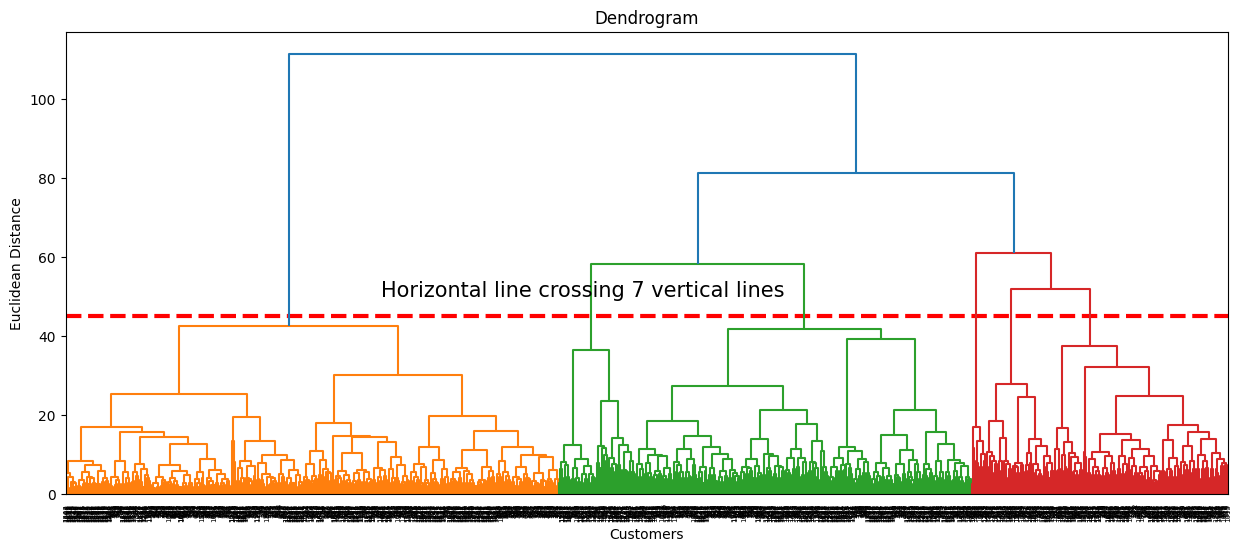

In [99]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xticks([])
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

plt.hlines(y=45, xmin=0, xmax=20000, lw=3, linestyle='--', color='red')
plt.text(x=4500, y=50, s="Horizontal line crossing 7 vertical lines", fontsize=15)

dendrogram = sch.dendrogram(sch.linkage(scaled_data.iloc[:, :24], method='ward'))
plt.show()

In [201]:
df.columns

Index(['Unnamed: 0.1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'zscore'],
      dtype='object')

# Classification

In [101]:
x = scaled_data.iloc[:, :-1]
y = scaled_data.iloc[:, -1]

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [106]:
rclf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=0)
rclf.fit(x_train, y_train)
y_pred = rclf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9096385542168675

# KNN

In [107]:
x1 = x.values
y1 = y.values

In [108]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_classifier.fit(x1_train, y1_train)

KNeighborsClassifier()

In [110]:
y_predicted = KNN_classifier.predict(x1_test)
y_predicted

array([4, 5, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 5, 4, 3, 3, 2, 3, 0, 3, 6, 2,
       2, 3, 5, 2, 3, 3, 5, 5, 6, 5, 6, 1, 2, 3, 5, 5, 0, 1, 5, 0, 3, 6,
       3, 0, 5, 2, 5, 2, 2, 5, 2, 0, 6, 2, 2, 2, 3, 1, 3, 5, 3, 3, 5, 5,
       2, 5, 5, 5, 0, 1, 5, 0, 3, 3, 3, 0, 2, 0, 6, 5, 1, 2, 2, 4, 5, 2,
       6, 0, 0, 5, 3, 6, 3, 6, 0, 2, 2, 5, 0, 1, 0, 5, 6, 1, 0, 1, 0, 3,
       2, 2, 3, 1, 5, 5, 5, 0, 3, 5, 2, 2, 5, 6, 6, 6, 3, 3, 2, 2, 1, 3,
       5, 2, 5, 5, 2, 2, 2, 5, 5, 5, 0, 2, 0, 1, 5, 3, 2, 2, 0, 2, 6, 6,
       1, 0, 3, 2, 5, 2, 5, 3, 3, 5, 2, 0, 3, 2, 0, 2, 3, 0, 3, 5, 0, 2,
       2, 3, 1, 5, 5, 3, 3, 1, 1, 5, 5, 3, 6, 0, 2, 2, 0, 5, 0, 6, 0, 3,
       2, 5, 4, 3, 5, 5, 3, 5, 5, 5, 0, 3, 3, 2, 0, 5, 3, 2, 3, 3, 5, 3,
       3, 6, 6, 3, 2, 0, 4, 2, 0, 6, 0, 2, 3, 6, 0, 0, 0, 2, 3, 3, 5, 5,
       0, 0, 5, 2, 0, 0, 5, 6, 2, 5, 2, 0, 5, 2, 1, 3, 5, 0, 3, 0, 5, 3,
       0, 0, 3, 5, 5, 0, 2, 3, 3, 4, 2, 3, 2, 0, 3, 5, 3, 5, 0, 0, 3, 5,
       5, 0, 6, 5, 3, 3, 3, 5, 3, 3, 5, 6, 5, 3, 4,

In [111]:
from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(y1_train, KNN_classifier.predict(x1_train)))
print("Test set accuracy:", metrics.accuracy_score(y1_test, y_predicted))

Train set accuracy: 0.9435240963855421
Test set accuracy: 0.9096385542168675


In [112]:
metrics.confusion_matrix(y1_train, KNN_classifier.predict(x1_train))

array([[247,   0,   2,   0,   0,  11,   0],
       [  0,  53,   1,   0,   0,   3,   0],
       [  1,   0, 323,  10,   0,   1,   0],
       [  0,   0,  10, 289,   0,  10,   0],
       [  0,   0,   0,   0,  13,   0,   0],
       [  5,   1,   4,  13,   0, 250,   0],
       [  1,   0,   0,   0,   0,   2,  78]], dtype=int64)

In [113]:
metrics.confusion_matrix(y1_test, y_predicted)

array([[50,  0,  0,  0,  0,  3,  0],
       [ 1, 17,  0,  0,  0,  0,  0],
       [ 0,  0, 68,  6,  0,  0,  0],
       [ 0,  0,  4, 63,  0,  4,  0],
       [ 0,  0,  0,  0,  7,  0,  0],
       [ 2,  0,  3,  6,  0, 71,  0],
       [ 1,  0,  0,  0,  0,  0, 26]], dtype=int64)

In [115]:
from sklearn.model_selection import cross_val_score
Ks = 20
accuracy_rate = []
for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x1_train, y1_train)
    score = cross_val_score(neigh, x1, y1, cv=10)
    accuracy_rate.append(score.mean())

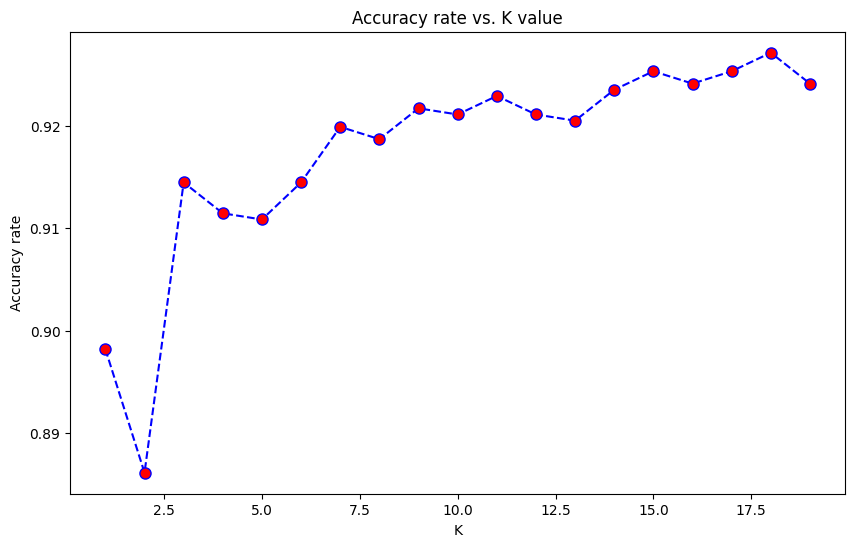

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Accuracy rate vs. K value')
plt.xlabel('K')
plt.ylabel('Accuracy rate')
plt.show()

In [117]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(x1_train, y1_train)
neigh

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [118]:
from sklearn.metrics import accuracy_score, classification_report
pred = neigh.predict(x1_test)
s1 = accuracy_score(y1_test, pred)
s1

0.9036144578313253

In [121]:
new_data = pd.read_csv("C:\\Users\\franc\\Downloads\\customer_test.csv")
new_data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


In [126]:
new_data1 = new_data.values

In [130]:
new_data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0
